<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/production_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax 
jax.config.update("jax_enable_x64", True)
import jaxopt
import jax.numpy as jnp 
from functools import partial 
from typing import NamedTuple 

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [7]:
class Params(NamedTuple):
  """Parameters related to the
  production fn"""
  productivity: float 

class ChoiceVariables(NamedTuple):
  """Input levels"""
  input1: float 

class Outputs(NamedTuple):
  """Outputs of the production process"""
  output1: float

def F(params: Params, input1: float): 
  """Production Function"""
  output1 = params.productivity * jnp.sqrt(input1)
  return Outputs(output1)

In [8]:
n = 1000
params = Params(3.0)                                               
input1s = jnp.linspace(0, 20, n)             
outputs = jax.vmap(partial(F, params))(input1s)                        

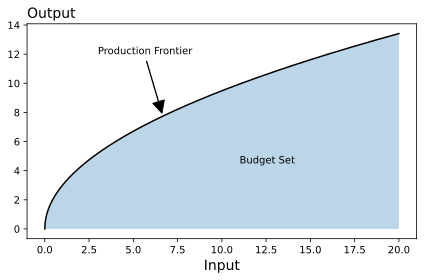

In [9]:
fig = plt.figure(dpi=300, tight_layout=True)
plt.plot(input1s, outputs.output1, color='black')
plt.fill_between(input1s, outputs.output1, alpha=0.3)
plt.annotate('Production Frontier', xy=(input1s[n//3].item(),outputs.output1[n//3].item()), xytext=(3, 12.),
            arrowprops=dict(facecolor='black', shrink=0.05, width=.3),
            )
plt.annotate('Budget Set', (11.0, 4.5))
plt.title('Output', loc='left', size=14)
plt.xlabel('Input', size=14)
fig.savefig('production_fn.png')
plt.show()

In [5]:
def F(x, y, A=3, alpha=0.8, beta=1.3):
    return A*x**alpha*y**beta 

def implicit_grad(F, x, y):
    marginal_product_x, marginal_product_y = jax.grad(F, argnums=(0,1))(x, y)
    return -marginal_product_x/marginal_product_y

print(f"Output: {F(10., 2.):.2f}, TRS: {implicit_grad(F, 10., 2.):.2f}")

In [ ]:
def implicit_function(x, F, level):
    solver = jaxopt.GradientDescent(fun=lambda y: (F(x,y)-level)**2, maxiter=500)
    return solver.run(1.).params 

def implicit_grad2(F, x, level):
    y = implicit_function(x, F, level)  
    return implicit_grad(F, x, y)

In [ ]:
print(implicit_grad(F, 2., 10.), implicit_grad2(F, 2., F(2., 10.)))